In [9]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist #this is a size of 28x28 images data set of numbers
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = tf.keras.utils.normalize(x_train)
x_test = tf.keras.utils.normalize(x_test)

model = tf.keras.models.Sequential() #this is the feedforward model
model.add(tf.keras.layers.Flatten()) #input layer
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) #has 128 neurons, use relu as the default activation function
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) #we will use soft max because this is a prob. dis. 

model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy']
             ) #the neural network tries to minimize the loss, instead of adam optimizer u can use Gradient descent
               #in case of cats and dogs u can use 'binary'
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
60000/60000 [==============================] - 9s 150us/sample - loss: 0.2598 - acc: 0.9216
Epoch 2/3
60000/60000 [==============================] - 9s 158us/sample - loss: 0.1087 - acc: 0.9658
Epoch 3/3
60000/60000 [==============================] - 9s 156us/sample - loss: 0.0764 - acc: 0.9763


In [ ]:
import matplotlib.pyplot as plt
#to gain some intuition and help me as i go
plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()
print(x_train[0])

In [11]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print("val_loss", " = " , val_loss)
print("val_acc" , " = " , val_acc)

10000/10000 [==============================] - 0s 49us/sample - loss: 0.0888 - acc: 0.9722
val_loss  =  0.08881561647700145
val_acc  =  0.9722


In [12]:
predictions = model.predict([x_test]) #always takes a list, here the list is that of probs.

In [13]:
import numpy as np
print(np.argmax(predictions[0])) #you can predict any value contained in predictions

7


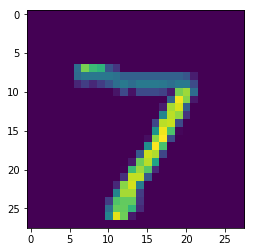

In [14]:
plt.imshow(x_test[0]) #the diff between x_test and predictions is that x_test is the list of pixels, the predictions
plt.show()            #are the final value